### 【問題1】練習のために特徴量の選択
```
GrLivAreaとYearBuilt
```

In [6]:
import pandas as pd
from IPython.display import display
pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_info_rows', 6)

df_base = pd.read_csv("../week3/house-prices-advanced-regression-techniques/train.csv")
df = df_base.loc[:, ["GrLivArea", "YearBuilt", "SalePrice"]]
feature_names = ["GrLivArea", "YearBuilt"]
y_name = "SalePrice"
x = df_base.loc[:, feature_names]
y = df_base[y_name]
display(x)


hoge
      GrLivArea  YearBuilt
0          1710       2003
1          1262       1976
2          1786       2001
3          1717       1915
4          2198       2000
...         ...        ...
1455       1647       1999
1456       2073       1978
1457       2340       1941
1458       1078       1950
1459       1256       1965

[1460 rows x 2 columns]


### 【問題2】線形回帰による推定と評価

1460

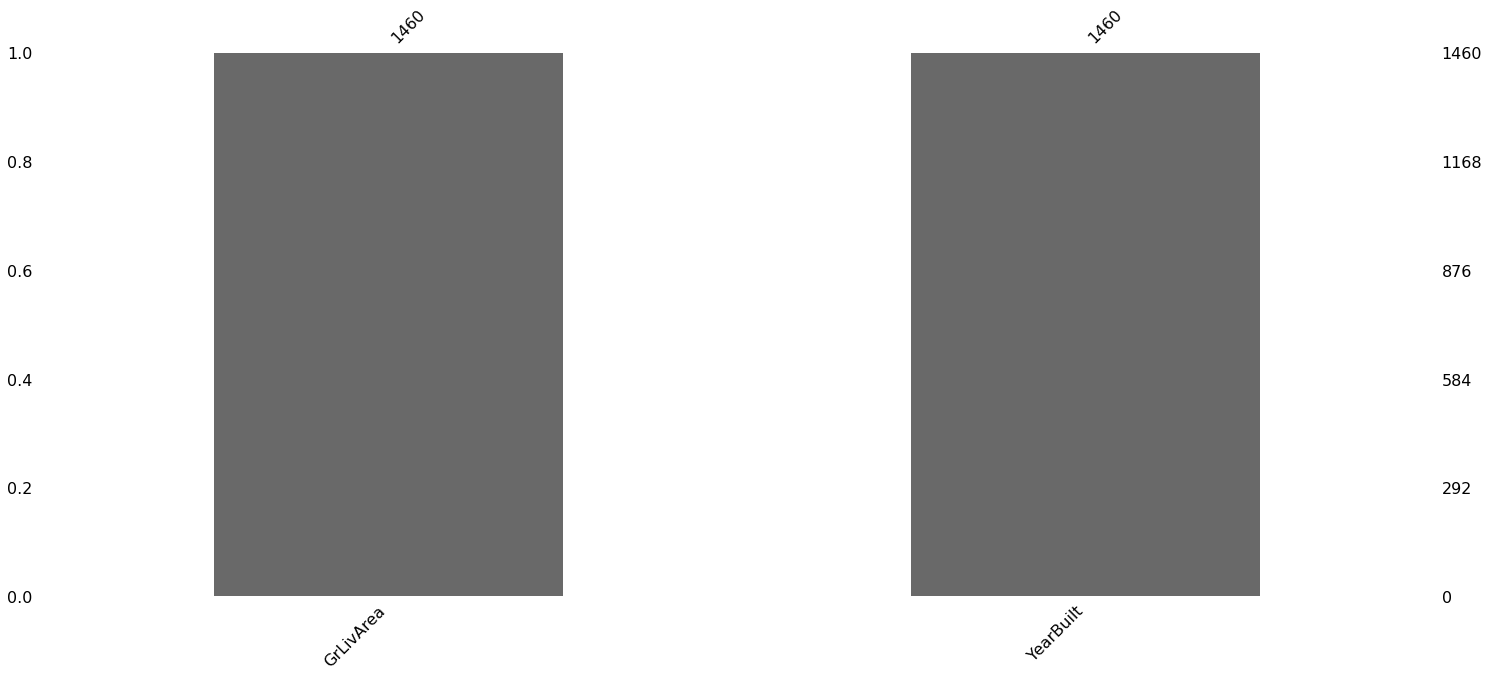

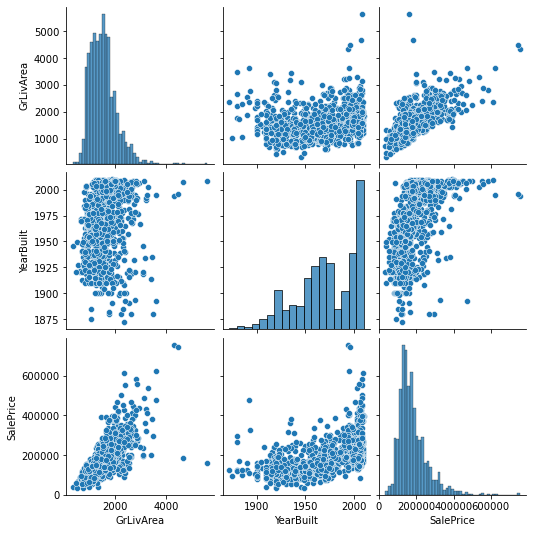

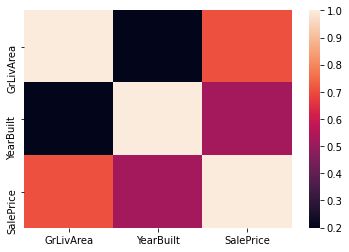

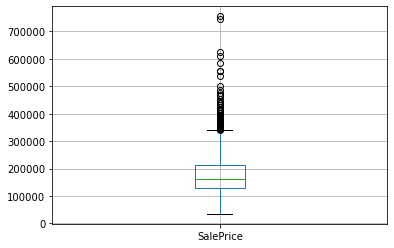

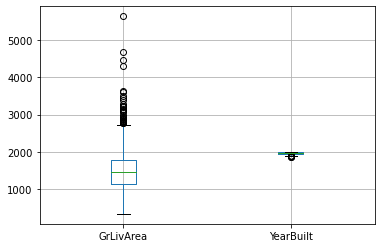

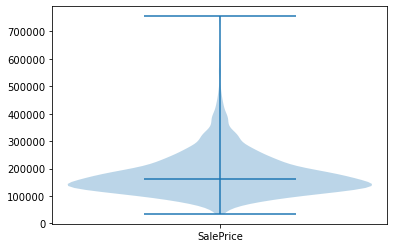

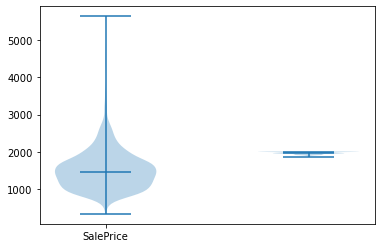

In [22]:
#
# 分析/可視化
# memo: 可視化の段階で標準化していないと各値のスケールが違ってグラフ化しづらい
# 

import missingno as msno
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# 欠損値
display(len(x))
msno.bar(x)
plt.show()

# 散布図行列
sns.pairplot(df)
plt.show()

# 相関行列 ヒートマップ
corr = df.corr()
sns.heatmap(corr)
plt.show()

# 箱ひげ図
df.loc[:, [y_name]].plot.box()
plt.grid()
plt.show()
df.loc[:, feature_names].plot.box()
plt.grid()
plt.show()

# バイオリン図（violinplot）
plt.violinplot(df.loc[:, [y_name]], showmedians=True)
plt.xticks([1], [y_name])
plt.show()
plt.violinplot(df.loc[:, feature_names], showmedians=True)
plt.xticks([1], [y_name])
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

# 前処理: 標準化

# 前処理: 対数変換
display(df.skew()) # 歪度
display(df.kurt())   # 尖度

# 前処理: データ分割
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=0)

GrLivArea    1.366560
YearBuilt   -0.613461
SalePrice    1.882876
dtype: float64

GrLivArea    4.895121
YearBuilt   -0.439552
SalePrice    6.536282
dtype: float64

In [25]:
# 学習、推定、評価
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# 学習
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)

# 評価: MSE
lr_mse = mean_absolute_error(y_test, y_pred)
display(lr_mse)

31844.328697132212

### 【問題3】手法の比較

In [30]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn import svm

def multi_fit(x_train, y_train, x_test, y_test):
    # LinearRegression
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_pred = lr.predict(x_test)
    lr_mse = mean_absolute_error(y_test, y_pred)
    print(f"LinearRegression:\t{int(lr_mse)}")

    # SVM
    svr = svm.SVR()
    svr.fit(x_train, y_train)
    y_pred = svr.predict(x_test)
    svr_mse = mean_absolute_error(y_test, y_pred)
    print(f"SVM:\t\t\t{int(svr_mse)}")

    # 決定木
    from sklearn.tree import DecisionTreeRegressor
    dtc = DecisionTreeRegressor()
    dtc.fit(x_train, y_train)
    y_pred = dtc.predict(x_test)
    dtc_mse = mean_absolute_error(y_test, y_pred)
    print(f"DecisionTree:\t\t{int(dtc_mse)}")

    # ランダムフォレスト
    from sklearn.ensemble import RandomForestRegressor
    rfc = RandomForestRegressor()
    rfc.fit(x_train, y_train)
    y_pred = rfc.predict(x_test)
    rfc_mse = mean_absolute_error(y_test, y_pred)
    print(f"RandomForest:\t{int(rfc_mse)}")
    
    avg = (lr_mse + svr_mse  + dtc_mse + rfc_mse) / 4
    print(f"avg:\t{int(avg)}")

multi_fit(x_train, y_train, x_test, y_test)

LinearRegression:	26819
SVM:			55191
DecisionTree:		27189
RandomForest:	21941
avg:	32785


### 【問題4】（アドバンス課題）他の特徴量も使用しての学習

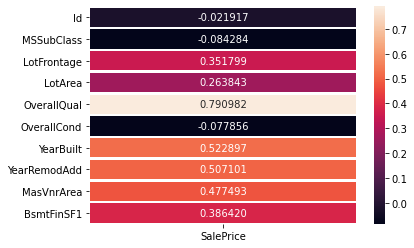

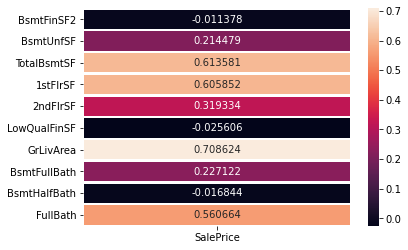

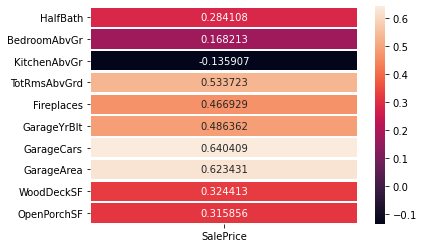

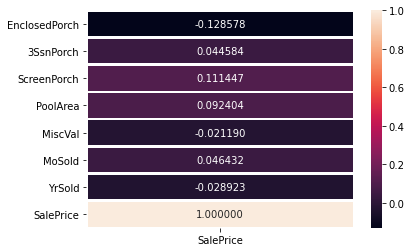

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# よさげな特徴量探す
corr = df_base.corr()
corr_y = corr.loc[:, ["SalePrice"]]
sns.heatmap(corr_y[:10], annot=True, fmt="f", linewidths=1.5)
plt.show()
sns.heatmap(corr_y[10:20], annot=True, fmt="f", linewidths=1.5)
plt.show()
sns.heatmap(corr_y[20:30], annot=True, fmt="f", linewidths=1.5)
plt.show()
sns.heatmap(corr_y[30:40], annot=True, fmt="f", linewidths=1.5)
plt.show()

In [32]:
x = df_base.loc[:, ["GrLivArea", "YearBuilt", "GarageCars", "GarageArea", "OverallQual"]]
display(x)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=0)
multi_fit(x_train, y_train, x_test, y_test)

,GrLivArea,YearBuilt,GarageCars,GarageArea,OverallQual
0,1710,2003,2,548,7
1,1262,1976,2,460,6
2,1786,2001,2,608,7
3,1717,1915,3,642,7
4,2198,2000,3,836,8
...,...,...,...,...,...
1455,1647,1999,2,460,6
1456,2073,1978,2,500,6
1457,2340,1941,1,252,7
1458,1078,1950,1,240,5


LinearRegression:	26819
SVM:			55191
DecisionTree:		27196
RandomForest:	21732
avg:	32734
